In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
zomato_df = pd.read_csv("C:/Users/Administrator/Downloads/zomato_restaurants.csv")

In [6]:
zomato_df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [7]:
zomato_df.shape

(51717, 17)

In [8]:
zomato_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

#### 1. Total Number of Restaurants

In [10]:
len(zomato_df['name'].unique())

8792

#### 2. Restaurant with Online Order Option.

In [12]:
zomato_df['online_order'].value_counts() / zomato_df.shape[0] * 100

online_order
Yes    58.866524
No     41.133476
Name: count, dtype: float64

In [13]:
zomato_df['online_order'].unique()

array(['Yes', 'No'], dtype=object)

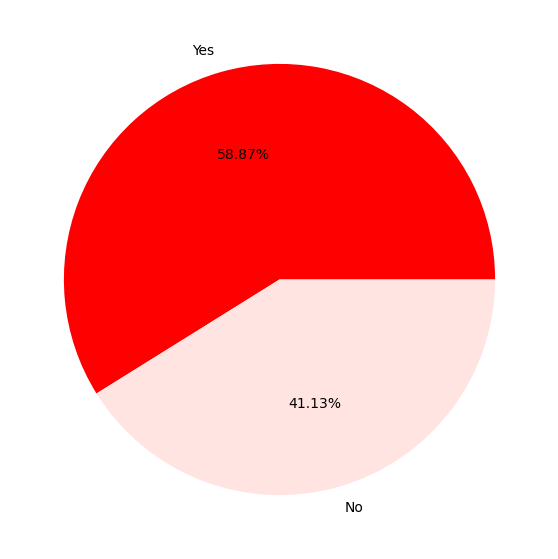

In [14]:
plt.figure(figsize = (7,7))
plt.pie(zomato_df['online_order'].value_counts(), labels = zomato_df['online_order'].unique(),
       autopct = '%0.2f%%', colors = ['red','mistyrose'])
plt.show()

#### 3. Restaurant with Online Book Table Option.

In [16]:
zomato_df['book_table'].value_counts() / zomato_df.shape[0] * 100

book_table
No     87.530213
Yes    12.469787
Name: count, dtype: float64

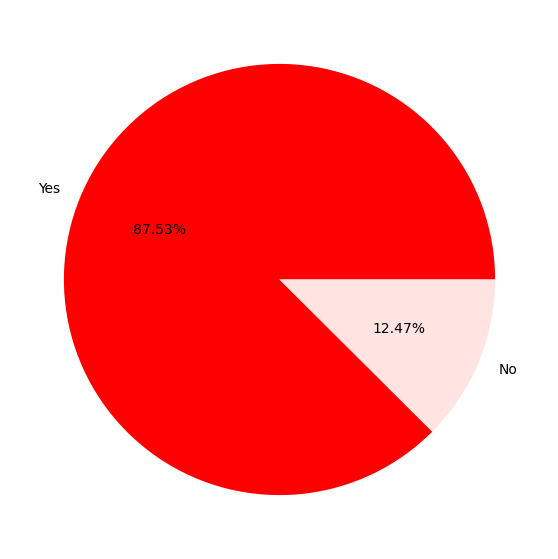

In [17]:
plt.figure(figsize = (7,7))
plt.pie(zomato_df['book_table'].value_counts(), labels = zomato_df['online_order'].unique(),
       autopct = '%0.2f%%', colors = ['red','mistyrose'])
plt.show()

#### 4. Famous Chains in Bengaluru

In [19]:
zomato_df['name'].value_counts().sort_values(ascending=False)[:21]

name
Cafe Coffee Day      96
Onesta               85
Just Bake            73
Empire Restaurant    71
Five Star Chicken    70
Kanti Sweets         68
Petoo                66
Polar Bear           65
Baskin Robbins       64
Chef Baker's         62
Pizza Hut            62
Sweet Truth          60
Beijing Bites        60
Subway               60
KFC                  60
Domino's Pizza       60
Smoor                59
McDonald's           59
Chai Point           58
Faasos               57
Lassi Shop           56
Name: count, dtype: int64

In [20]:
names = zomato_df['name'].value_counts().sort_values(ascending=False)[:21].index

In [21]:
restaurant_count = zomato_df['name'].value_counts().sort_values(ascending=False)[:21].values

<Axes: ylabel='name'>

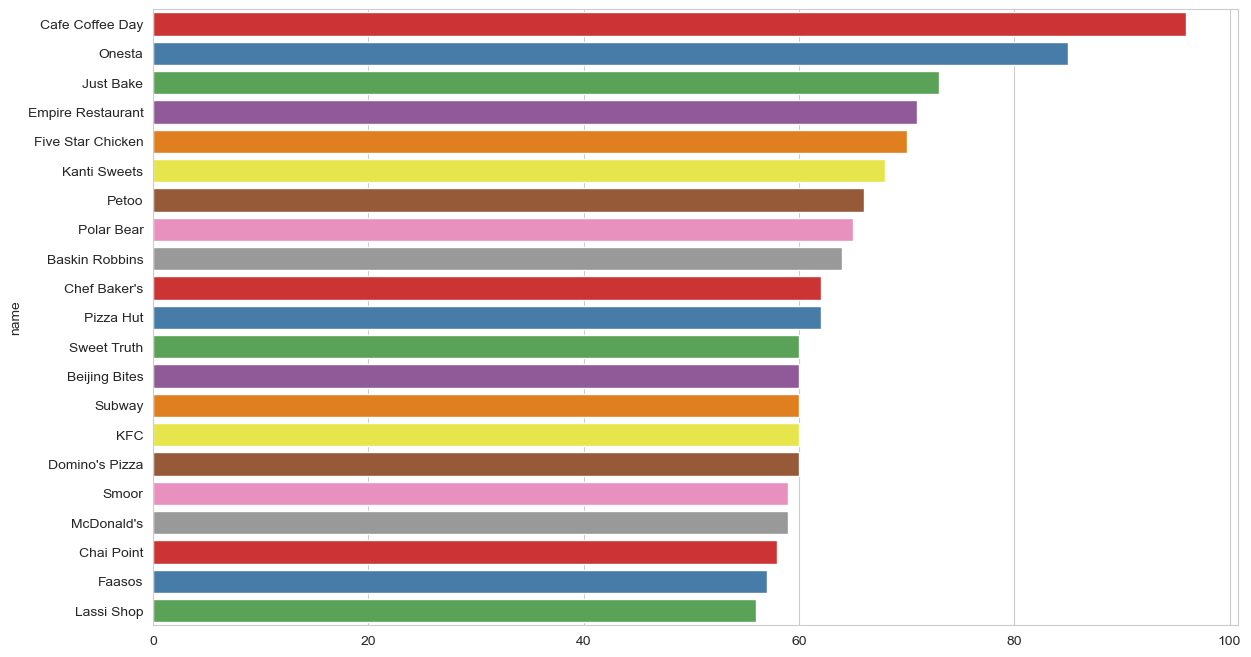

In [22]:
plt.figure(figsize = (14,8))
sns.set_style('whitegrid')
sns.barplot(x = restaurant_count, y = names, orient='h', hue = names, palette='Set1')

#### 5. Find Most Popular Restaurant Type in Bengaluru.

In [24]:
zomato_df['rest_type'].value_counts().sort_values(ascending=False)[:21]

rest_type
Quick Bites                   19132
Casual Dining                 10330
Cafe                           3732
Delivery                       2604
Dessert Parlor                 2263
Takeaway, Delivery             2037
Casual Dining, Bar             1154
Bakery                         1141
Beverage Shop                   867
Bar                             697
Food Court                      624
Sweet Shop                      468
Bar, Casual Dining              425
Lounge                          396
Pub                             357
Fine Dining                     346
Casual Dining, Cafe             319
Beverage Shop, Quick Bites      298
Bakery, Quick Bites             289
Mess                            267
Pub, Casual Dining              255
Name: count, dtype: int64

In [25]:
rest_type = zomato_df['rest_type'].value_counts().sort_values(ascending=False)[:21].index

In [26]:
rest_type_count = zomato_df['rest_type'].value_counts().sort_values(ascending=False)[:21].values

<Axes: ylabel='rest_type'>

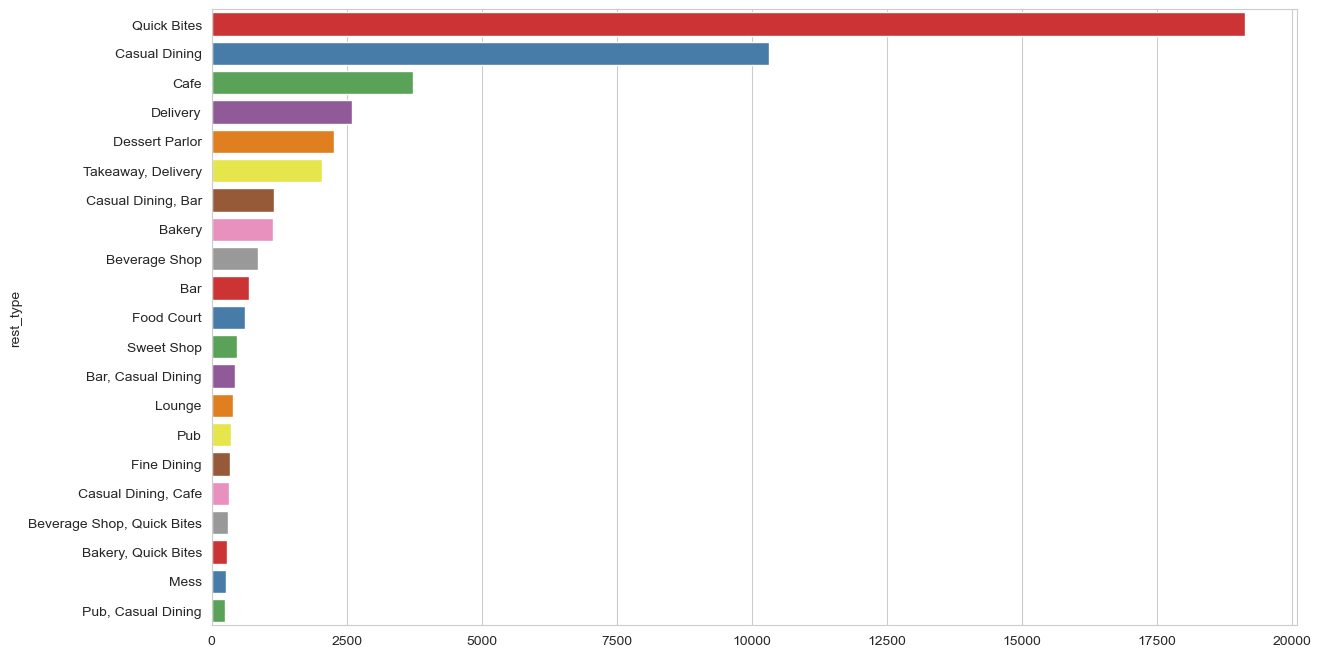

In [27]:
plt.figure(figsize = (14,8))
sns.set_style('whitegrid')
sns.barplot(x = rest_type_count, y = rest_type, orient='h', hue = rest_type, palette='Set1')

* Most popular restaurant type in Bengaluru is Quick Bytes. 

#### 6. Distribution of Restaurant Cost (For 2 Person).

In [30]:
zomato_df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [31]:
zomato_df['approx_cost(for two people)'] = zomato_df['approx_cost(for two people)'].str.replace(',','').astype('float64')

#### Check if it is skewed? 

<Axes: xlabel='approx_cost(for two people)', ylabel='Density'>

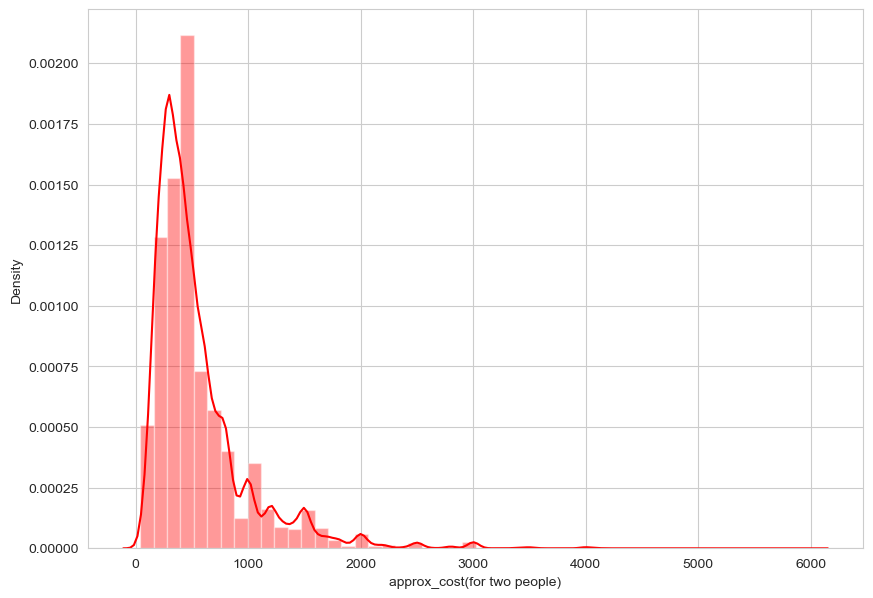

In [33]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize = (10,7))
sns.distplot(zomato_df['approx_cost(for two people)'], color = 'red')

<Axes: xlabel='approx_cost(for two people)'>

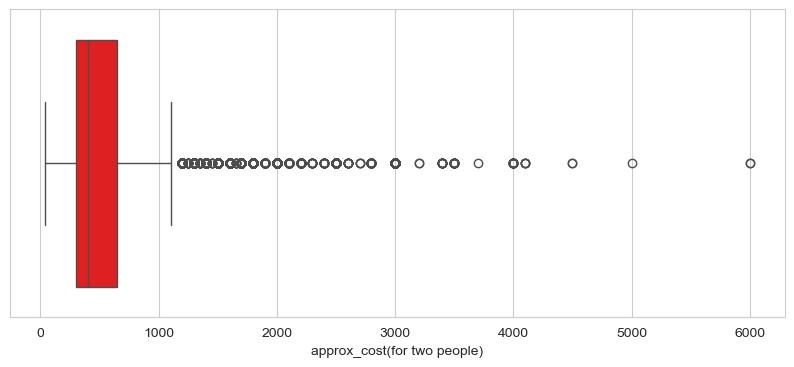

In [34]:
plt.figure(figsize = (10,4))
sns.boxplot(zomato_df['approx_cost(for two people)'], color = 'red', orient='h')

In [35]:
zomato_df['approx_cost(for two people)'].median()

400.0

In [36]:
Q1 = zomato_df['approx_cost(for two people)'].quantile(0.25)
Q2 = zomato_df['approx_cost(for two people)'].quantile(0.5)
Q3 = zomato_df['approx_cost(for two people)'].quantile(0.75)
print("First Quartile: ", Q1, "\nMedian: ", Q2, "\nThird Quartile: ", Q3)

First Quartile:  300.0 
Median:  400.0 
Third Quartile:  650.0


In [37]:
IQR = Q3 - Q1
print("Inter-Quartile Range of Cost for two people: ", IQR)

Inter-Quartile Range of Cost for two people:  350.0


* Approx cost of two people range from Rs. 300 to Rs. 650, with meadian cost approx to Rs. 400. Yes the approx cost for two person is skewed towards positive. Hence, Positive Skewness.

#### 7. Find Least Popular Restaurant Type in Bengaluru.

In [40]:
zomato_df['rest_type'].value_counts().sort_values(ascending=True)[:20]
least_rest_type = zomato_df['rest_type'].value_counts().sort_values(ascending=True)[:20].index
least_rest_count = zomato_df['rest_type'].value_counts().sort_values(ascending=True)[:20].values

<Axes: ylabel='rest_type'>

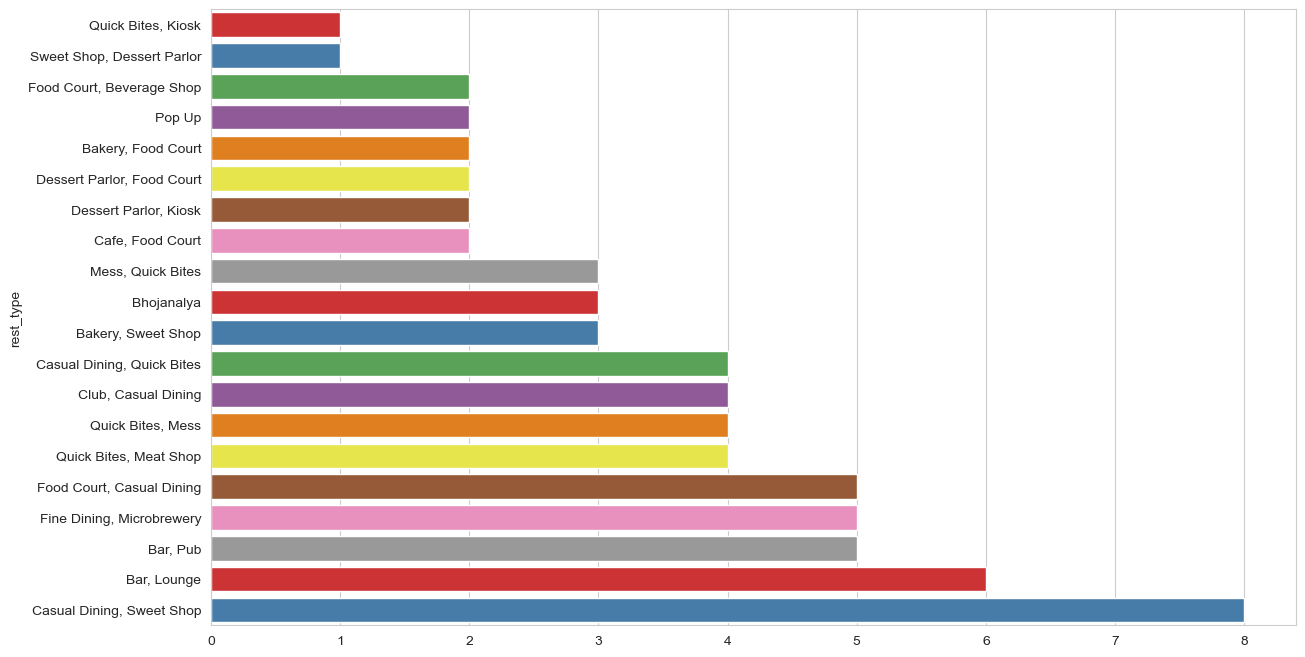

In [41]:
plt.figure(figsize = (14,8))
sns.set_style('whitegrid')
sns.barplot(x = least_rest_count, y = least_rest_type, orient='h', hue = least_rest_type, 
            palette='Set1')

#### 8. Which are the Top 20 Locations with Most Number of Restaurants.


In [43]:
city = zomato_df['listed_in(city)'].value_counts().sort_values(ascending=False)[:20].index
city_count = zomato_df['listed_in(city)'].value_counts().sort_values(ascending=False)[:20].values

<Axes: ylabel='listed_in(city)'>

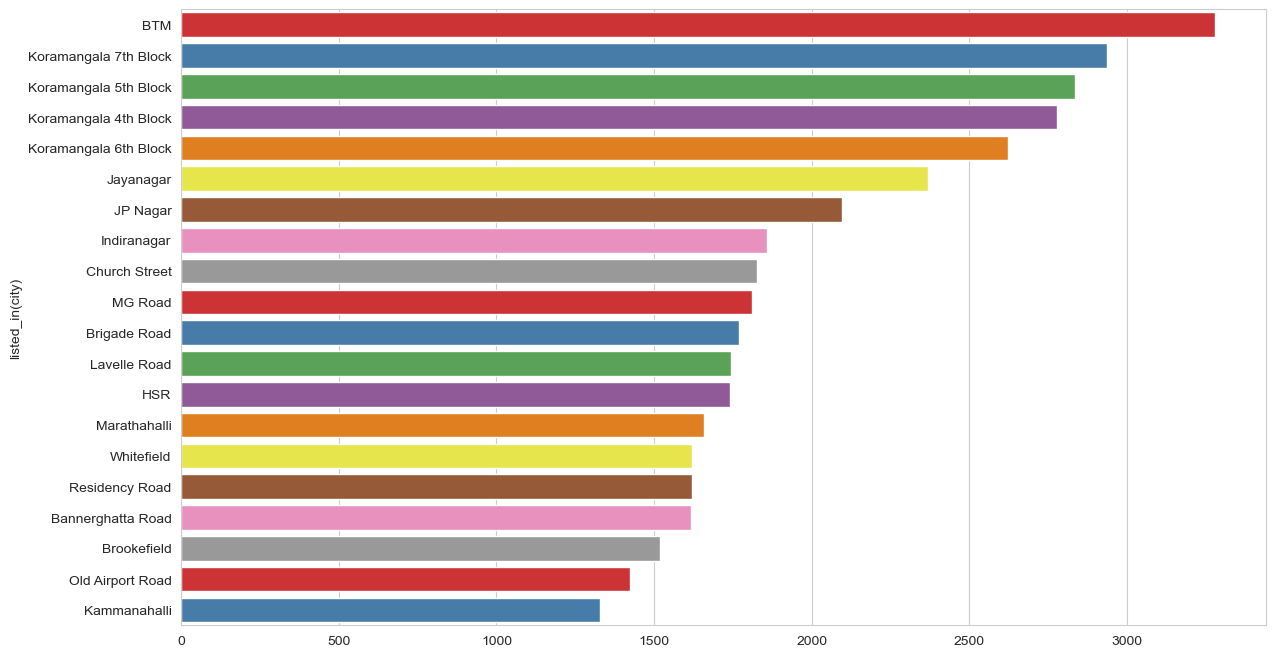

In [44]:
plt.figure(figsize = (14,8))
sns.set_style('whitegrid')
sns.barplot(x = city_count, y = city, orient='h', hue = city, palette='Set1')

* Most Popular Places in Bengaluru with most number of restaurant are - BTM Layout, Koramangala, Jayanagar. 

#### 9. Most Popular Restaurant's Category

In [47]:
zomato_df['cuisines'].value_counts() 

cuisines
North Indian                                   2913
North Indian, Chinese                          2385
South Indian                                   1828
Biryani                                         918
Bakery, Desserts                                911
                                               ... 
North Indian, Chinese, South Indian, Juices       1
North Indian, Chinese, Kebab, Mughlai             1
Chinese, Vietnamese, Thai, Malaysian              1
Arabian, Lebanese, Chinese, Rolls                 1
North Indian, Chinese, Arabian, Momos             1
Name: count, Length: 2723, dtype: int64

In [48]:
cuisines = zomato_df['cuisines'].value_counts().sort_values(ascending=False)[:20].index
restaurant_count = zomato_df['cuisines'].value_counts().sort_values(ascending=False)[:20].values

<Axes: ylabel='cuisines'>

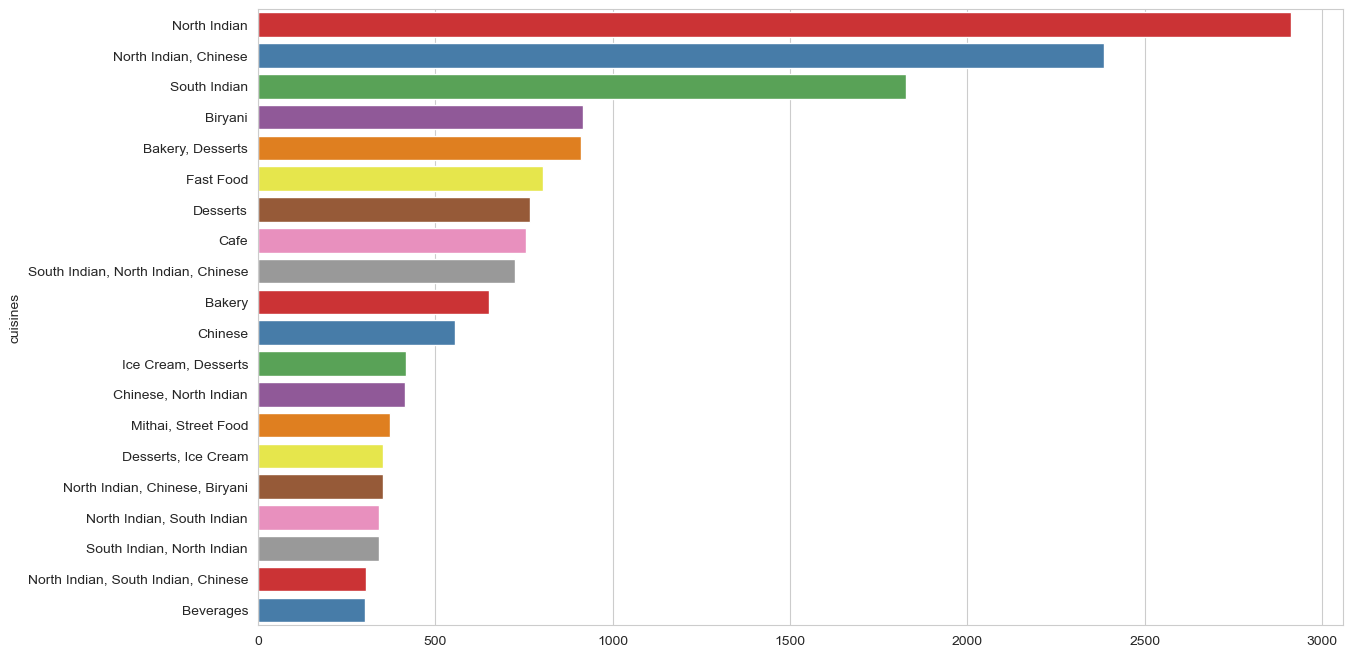

In [49]:
plt.figure(figsize = (14,8))
sns.set_style('whitegrid')
sns.barplot(x = restaurant_count, y = cuisines, orient='h', hue = cuisines, palette='Set1')

* Most popular Restaurant Category in Bengaluru are - North Indian, South Indian, Chinese, Biryani Outlets.

#### 10. Distribution of Restaurant Ratings.

In [52]:
zomato_df['rate'] = zomato_df['rate'].str.replace('/5', '').replace('-',np.nan).replace('NEW',np.nan).astype('float64')

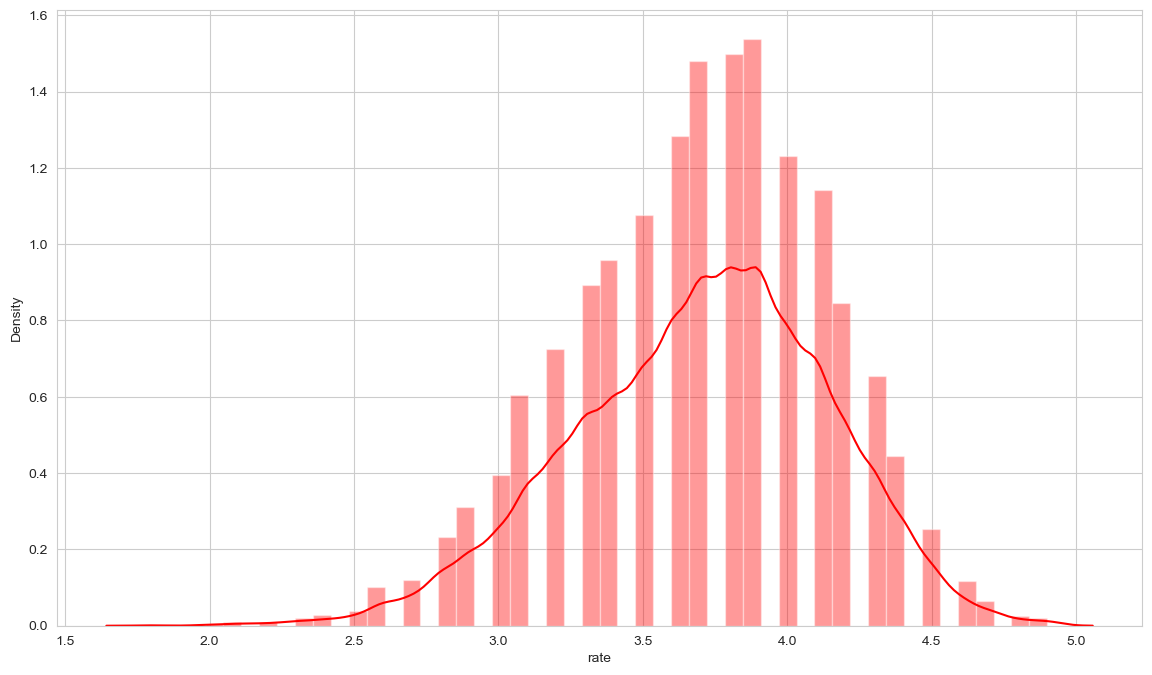

In [53]:
plt.figure(figsize = (14,8))
sns.set_style('whitegrid')
sns.distplot(zomato_df['rate'], color = 'red')
plt.show() 

#### 11. Top Rated Restaurant From Most Popular Restaurant Types.

In [55]:
top_rest_types = zomato_df['rest_type'].value_counts().sort_values(ascending=False)[:21].index

In [56]:
zomato_df.groupby('rest_type')[['name','rate']].max().filter(items = top_rest_types, axis = 0)

,name,rate
rest_type,,
Quick Bites,repEAT Hub,4.8
Casual Dining,nu.tree,4.9
Cafe,iSpice Resto Cafe,4.6
Delivery,nu.tree,4.6
Dessert Parlor,iFruit Live Ice Creams,4.9
"Takeaway, Delivery",sCoolMeal,4.5
"Casual Dining, Bar",re:cess - Hilton Bangalore Embassy GolfLinks,4.9
Bakery,YummTumm,4.8
Beverage Shop,Zaitoon Lassi Cafe,4.5


#### 12. Relationship Between Rating and Approx Cost (For Two Person)

<Axes: xlabel='rate', ylabel='approx_cost(for two people)'>

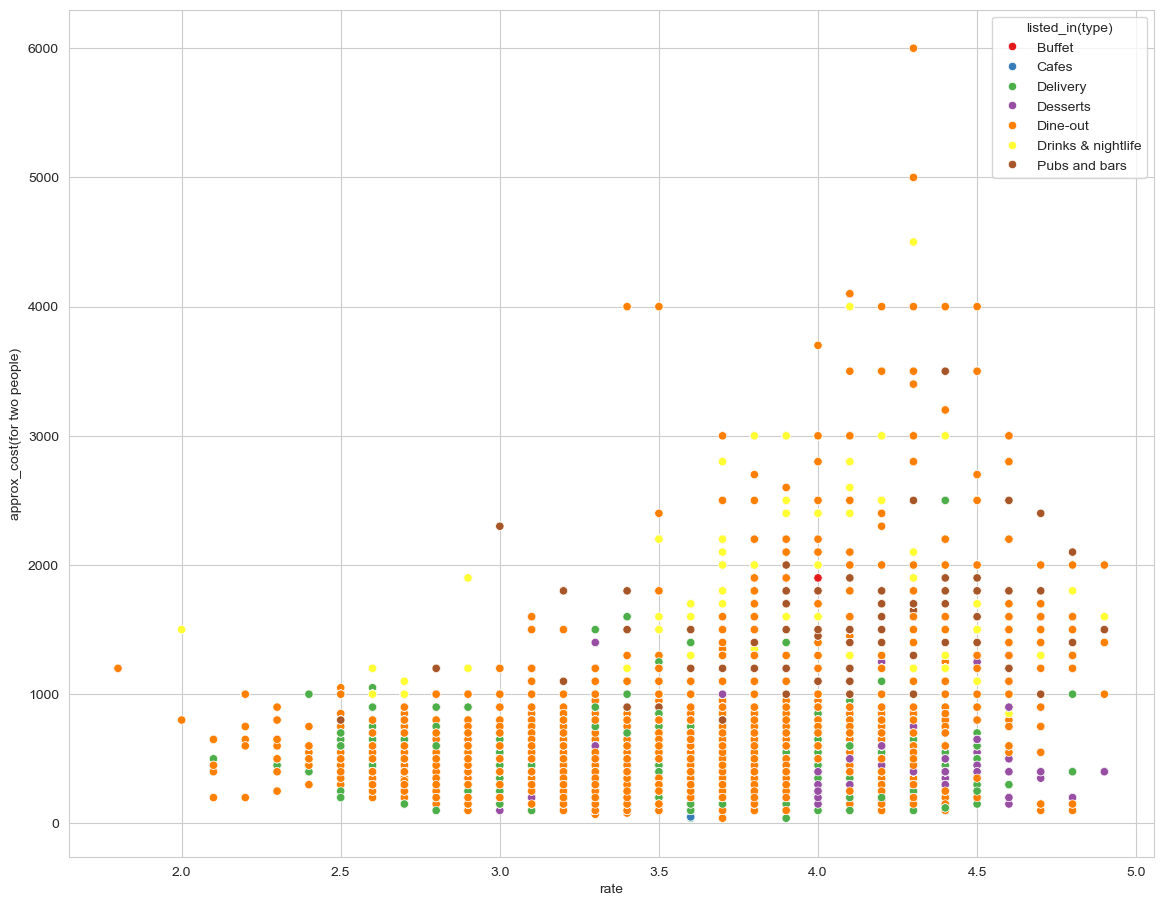

In [58]:
plt.figure(figsize = (14,11))
sns.scatterplot(x = 'rate', y = 'approx_cost(for two people)', data=zomato_df, hue='listed_in(type)',
               palette='Set1')

#### 13. Highlight the Resturant Frequency on Map.

In [60]:
!pip install geopy

In [61]:
!pip install folium

In [84]:
from geopy.geocoders import Nominatim
import pandas as pd
import numpy as np
import time

locations = pd.DataFrame({"Name": zomato_df['location'].unique()})
locations['Name'] = locations['Name'].apply(lambda x: "Bangalore " + str(x))
geolocator = Nominatim(user_agent="app")

def geocode_with_retry(location, retries=3, delay=5):
    for _ in range(retries):
        try:
            result = geolocator.geocode(location)
            if result:
                return (result.latitude, result.longitude)
        except (TimeoutError, Exception) as e:
            print(f"Error: {e}. Retrying...")
            time.sleep(delay)
    return np.nan

lat_long = []
for location in locations['Name']:
    geo = geocode_with_retry(location)
    lat_long.append(geo)

Error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=Bangalore+Banashankari&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)")). Retrying...
Error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=Bangalore+Banashankari&format=json&limit=1 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x000001FD2ADCA2A0>, 'Connection to nominatim.openstreetmap.org timed out. (connect timeout=1)')). Retrying...


KeyboardInterrupt: 

In [75]:
locations['geo_loc'] = lat_long
locations.to_csv('C:/Users/Administrator/Downloads/locations.csv', index = False)
locations["Name"] = locations['Name'].apply(lambda x : x.replace("Bangalore",""))
locations.head()

,Name,geo_loc
0,anashankari,"(12.9393328, 77.5539819)"
1,asavanagudi,"(12.9417261, 77.5755021)"
2,ysore Road,"(12.3868975, 76.6671106)"
3,ayanagar,"(12.9399039, 77.5826382)"
4,umaraswamy Layout,"(12.9067683, 77.5595021)"


In [94]:
locations = pd.read_csv("C:/Users/Administrator/Downloads/locations.csv")
locations.drop("Unnamed: 0", axis = 1, inplace = True)
locations["Name"] = locations['Name'].apply(lambda x : x.replace("Bangalore ",""))
locations.head()

,Name,geo_loc
0,Banashankari,"(12.9393328, 77.5539819)"
1,Basavanagudi,"(12.9417261, 77.5755021)"
2,Mysore Road,"(12.3868975, 76.6671106)"
3,Jayanagar,"(12.9399039, 77.5826382)"
4,Kumaraswamy Layout,"(12.9067683, 77.5595021)"


In [96]:
rest_locations = pd.DataFrame(zomato_df['location'].value_counts().reset_index())
rest_locations.columns = ['Name','count']
rest_locations = rest_locations.merge(locations, on = 'Name', how='left').dropna()
rest_locations

,Name,count,geo_loc
0,BTM,5124,"(12.9163603, 77.604733)"
1,HSR,2523,"(12.90056335, 77.64947470503677)"
2,Koramangala 5th Block,2504,"(12.9348429, 77.6189768)"
3,JP Nagar,2235,"(12.9096941, 77.5866067)"
4,Whitefield,2144,"(12.9696365, 77.7497448)"
...,...,...,...
88,West Bangalore,6,"(13.0096524, 77.5530535343493)"
89,Yelahanka,6,"(12.98815675, 77.62260003796)"
90,Jakkur,3,"(13.0724567, 77.6041563)"
91,Rajarajeshwari Nagar,2,"(12.94393425, 77.5091805440154)"


In [100]:
import folium
from folium.plugins import HeatMap

basemap = folium.Map(location=[12.97, 77.59], control_scale=True, zoom_start=12)
basemap

In [142]:
rest_locations['geo_loc'].str.lstrip("(").str.rstrip(")").str.split(", ")

0              [12.9163603, 77.604733]
1     [12.90056335, 77.64947470503677]
2             [12.9348429, 77.6189768]
3             [12.9096941, 77.5866067]
4             [12.9696365, 77.7497448]
                    ...               
88      [13.0096524, 77.5530535343493]
89       [12.98815675, 77.62260003796]
90            [13.0724567, 77.6041563]
91     [12.94393425, 77.5091805440154]
92            [13.0329419, 77.5273253]
Name: geo_loc, Length: 90, dtype: object

In [150]:
lat,lon=zip(*np.array(rest_locations['geo_loc'].str.lstrip("(").str.rstrip(")").str.split(", ")))
rest_locations['lat']=lat
rest_locations['lon']=lon
HeatMap(rest_locations[['lat','lon','count']].values.tolist(), zoom=20).add_to(basemap)

In [152]:
basemap